# When Aarogya Setu meets python
## Possible pre-warning system for Covid-19

#### Coronavirus needs humans to propagate and multiply.

By knowing how many (and which) people stand between you and a Covid positive person, proper measures can be taken for targeted social distancing. Knowledge of distance of Covid+ person in terms of people (or hops) can even help one to understand the urgency of Social distancing.

#### Example:
You have a maid working for you at home. She visits 5 other houses on a daily basis. In one of those houses, a pediatrician lives. The pediatrician goes to a hospital daily and yesterday, he met brother of a Covid positive (covid+) person.
This network method will help identifying this chain.

In this notebook, we analyse how we can use networks to make people more aware about covid-19 affected people around them. How far away is coronavirus from them as of now and how it is approaching them day-by-day. We will use Networkx python library here. People network, road network, communication network or any other kind of network can be easily analysed through it. 

In [2]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

### The data
Aarogya setu needs one's bluetooth to be always turned on. This means that it collects data about which other devices come in proximity of one's own device. Or in other words it should know which people (or Aarogya Setu user) you are meeting. A similar sample data can be found in this repository which looks like image below. This data has 2 columns (p1 and p2). Both of these columns have 9845 unique people numbered 1 - 9845. You can assume number as their respective names. Person named 1 meets person 33, 563, 564.... Person 2 meets 341, 689... and so on.

In [3]:
data = pd.read_csv("../data/people_network.csv")
data.loc[:10]

p1   p2
0    1   33
1    1  563
2    1  564
3    1  565
4    1  566
5    2  341
6    2  689
7    2  690
8    2  691
9    2  692
10   2  693

#

Now we make a small network using the first 200 rows of this dataset and view it.

In [4]:
G = nx.Graph()
[G.add_edge(data["p1"].loc[i],data["p2"].loc[i]) for i in range(200)]
"done"

'done'

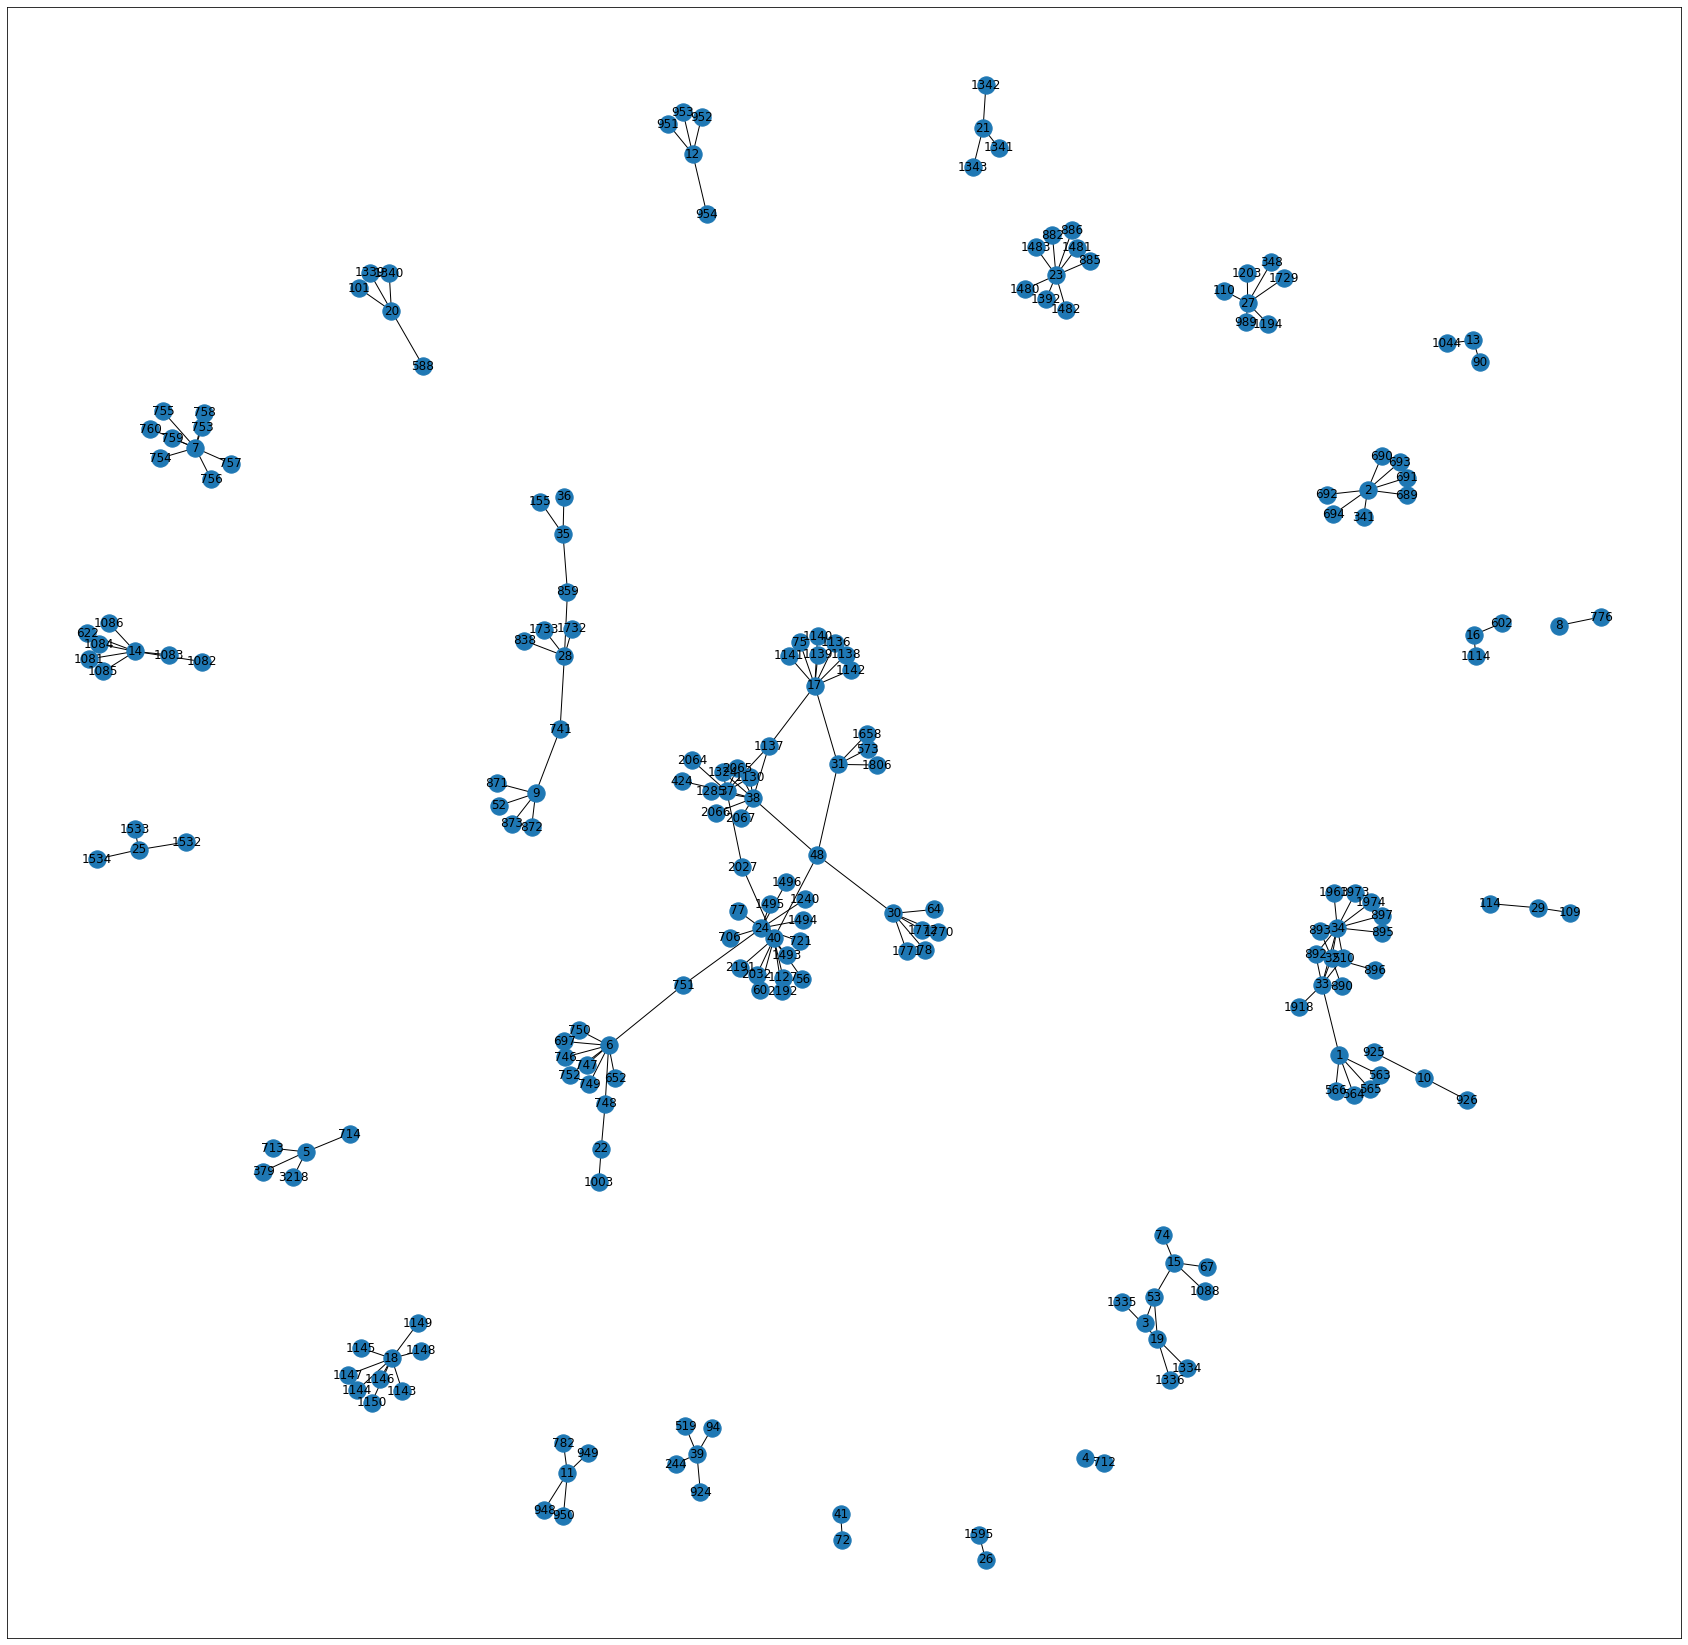

In [5]:
plt.figure(figsize=[30,30])
nx.draw_networkx(G,pos=nx.spring_layout(G))

Images can be zoomed to view properly. We see that we get the connections of initial persons like person-1,2,3,4.. Not all persons are connected to each other. This maybe because we are considering only a part of the data.

### Now we make a graph of full data and name it "full_network". We will not display this network as it is too big to view

In [6]:
full_network = nx.Graph()
[full_network.add_edge(data["p1"].loc[i],data["p2"].loc[i]) for i in range(len(data))]
print( "added total" ,len(full_network.nodes), "nodes to the network")

added total 9845 nodes to the network


We do some basic networkx operations. Shortest path from user 1 to user 179. All shortest paths from user 1 to 179. 

In [7]:
nx.shortest_path(full_network,source = 1,target=179)

[1, 33, 1918, 7550, 827, 2573, 536, 159, 179]

In [8]:
for path in nx.all_shortest_paths(full_network,source = 1,target=179):
    print(path)

[1, 33, 1918, 7550, 827, 2573, 536, 159, 179]
[1, 33, 1918, 7550, 3168, 2573, 536, 159, 179]
[1, 565, 1485, 3362, 386, 4090, 4720, 2423, 179]
[1, 566, 4112, 6193, 6012, 3147, 4720, 2423, 179]


## How to apply this to current covid-19 problem

### To begin, we randomly mark 200 out of 9845 people to be covid positive

In [9]:
np.random.seed(0)
covid_positive_people = np.random.choice(data["p1"].unique(),200, replace = False)
covid_positive_people

array([7107, 7916, 6713, 7938, 6615, 2380, 1309, 9818, 1173, 3446, 7227,
        566, 7849, 9609, 4424, 7784, 2710, 9191, 7258, 3614, 5232, 5444,
       3932, 9409, 6620,  886, 6276, 8591, 5179,  297, 1663, 1894, 2550,
       2500,  840, 8525, 8577, 5327, 2154, 9603, 3010, 1236, 9383,  425,
       8686, 1157, 4154, 9224, 8414, 8511, 5604, 8060, 6984, 7239, 7246,
       4245, 1893, 5135, 4215, 4077, 7978,  714, 2572, 4496, 4455, 6781,
       1766, 4446, 8513,  191, 2033, 5423, 9192, 7650,  463, 9429, 7266,
       8082, 9332,  488, 4435, 9594, 6502, 6934, 6534, 7531, 7094,  529,
       6711, 4098, 5341, 9361, 8180, 9456, 4408, 6427, 3411, 5978, 3999,
       6032, 2271, 9525, 6956, 7328, 2968, 6561, 1918, 5342, 5357, 2176,
       5019, 8586, 7309, 5046, 6296, 6858, 1479, 1359, 9795, 1870, 4982,
       1818, 5424, 4800, 8458, 1595, 6726, 7984,  552, 2607, 9843, 9794,
       9623, 2578, 6587, 8545, 5925, 7785, 1423, 3928, 8155, 3235, 7730,
        598, 3943, 4543, 4930, 6707, 7699, 3978, 21

In [10]:
def get_covid(p1):
    if p1 in covid_positive_people:
        return True
    return False
data["covid_positive"] = data["p1"].apply(get_covid)
data.loc[850:860]

p1    p2  covid_positive
850  189  5555           False
851  189  5556           False
852  190  5561           False
853  191  5563            True
854  191  5564            True
855  192   393           False
856  192   520           False
857  192  5092           False
858  193   152           False
859  193   210           False
860  193   274           False

#### Since person-191 is covid positive, we see rows 853,854 as marked positive for covid. All the rows where p1 is in covid_positive_people, the value if True in covid_positive column.

### Let us see how this network of 200 covid positive people looks like.

In [11]:
positive_data = data[data["p1"].isin(covid_positive_people)]
positive_data.shape

(1318, 3)

In [12]:
positive_graph = nx.Graph()
[positive_graph.add_edge(positive_data["p1"].iloc[i],positive_data["p2"].iloc[i]) for i in range(len(positive_data))]
#[positive_graph.add_edge(positive_data["p1"].iloc[i],-1) for i in range(len(positive_data))]
print("done")

done


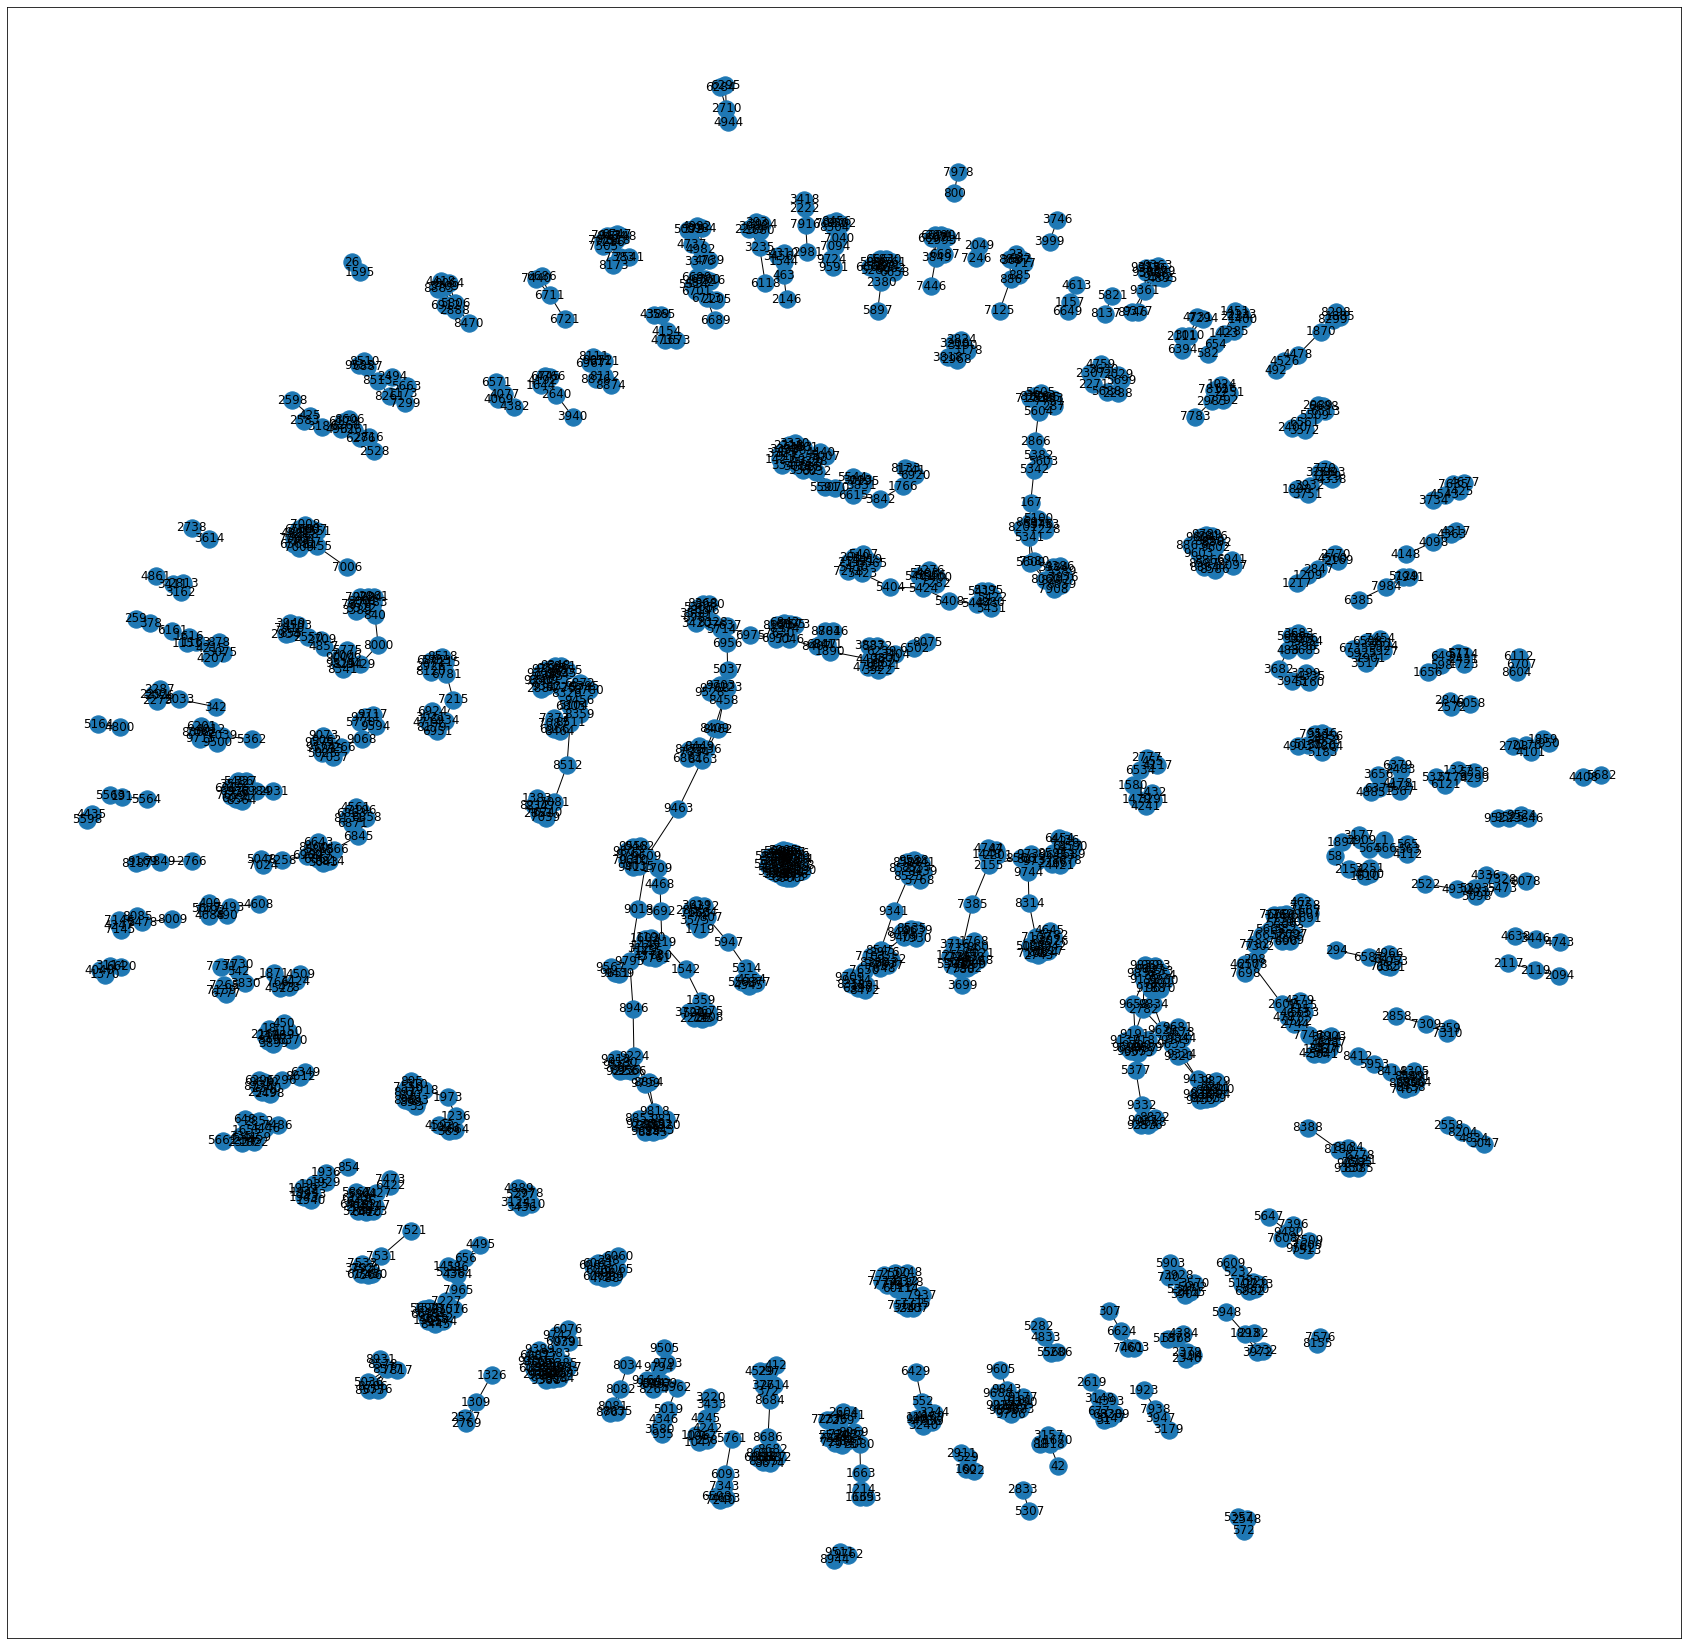

In [13]:
plt.figure(figsize=[30,30])
nx.draw_networkx(positive_graph,pos=nx.spring_layout(positive_graph))

That is quite cluttered graph with many clusters. Let's connect all the covid+ people.

### We add an arbitrary person numbered "-1"  and connect all covid+ people with this person.

We do this in both the graphs. In the graph named "positive_graph" we do just to to view their network and in "full_network" to find the distance of covid+ (or person number -1) from any other person.

In [14]:
[positive_graph.add_edge(positive_data["p1"].iloc[i],-1) for i in range(len(positive_data))]
[full_network.add_edge(i, -1) for i in covid_positive_people]
print("done")

done


### Let us check the graph of positive people again when they all are connected to each other

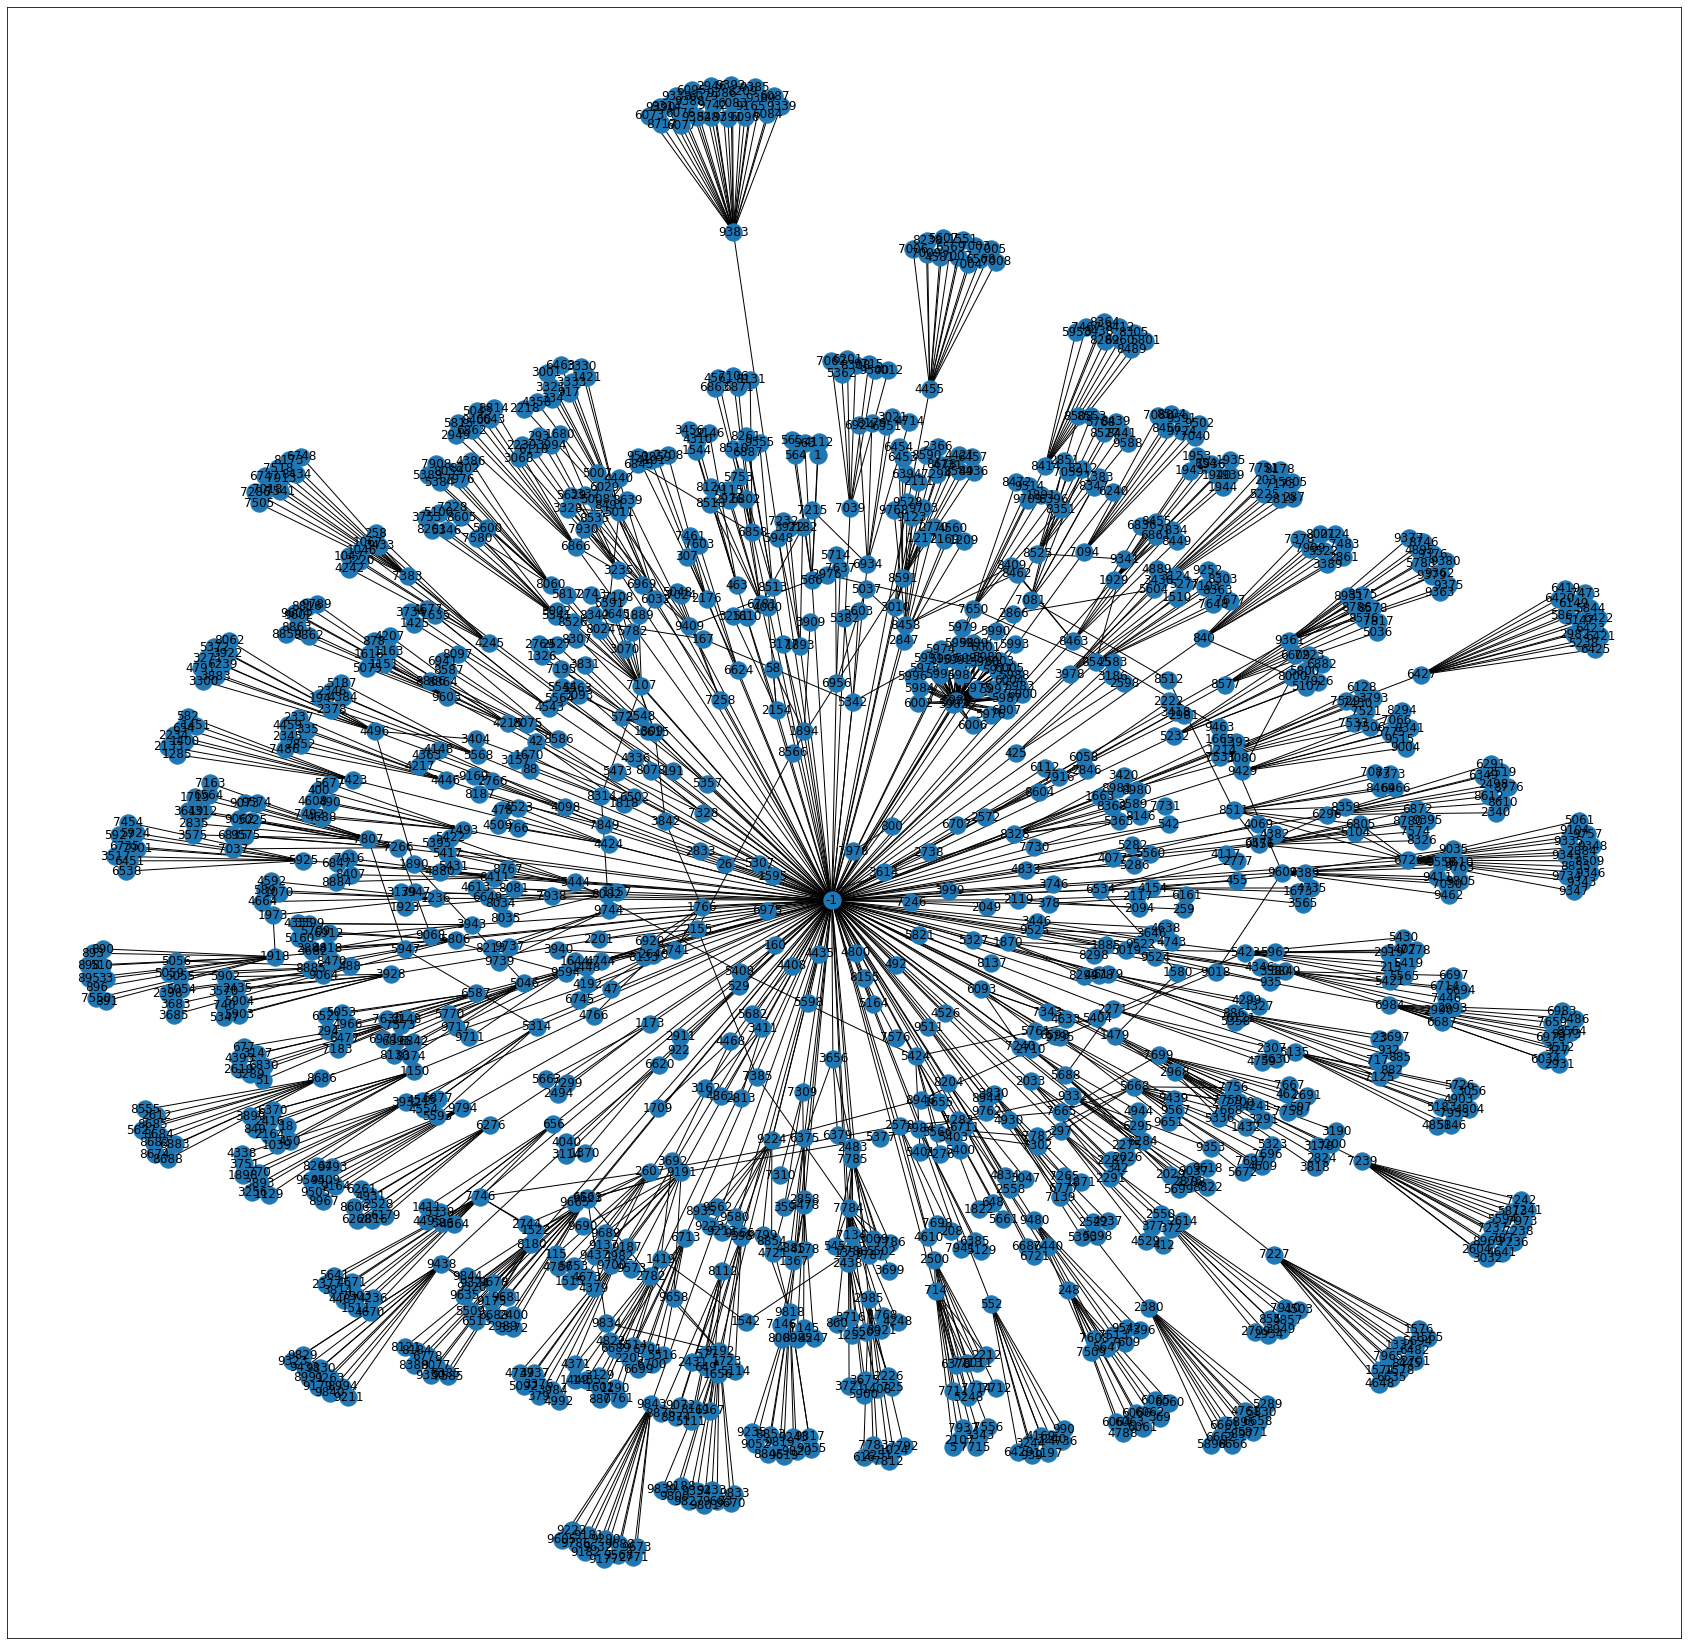

In [15]:
plt.figure(figsize=[30,30])
nx.draw_networkx(positive_graph,pos=nx.spring_layout(positive_graph))

We see person -1 right at the center of all. This was expected. 

### Now let us merge all covid+ people and treat them as a single person and see the network. This we do only for visualization and therefore we do not do this for "full_network" graph.

In [16]:
for i in range(len(covid_positive_people)):
    positive_graph = nx.contracted_nodes(positive_graph,-1, covid_positive_people[i])

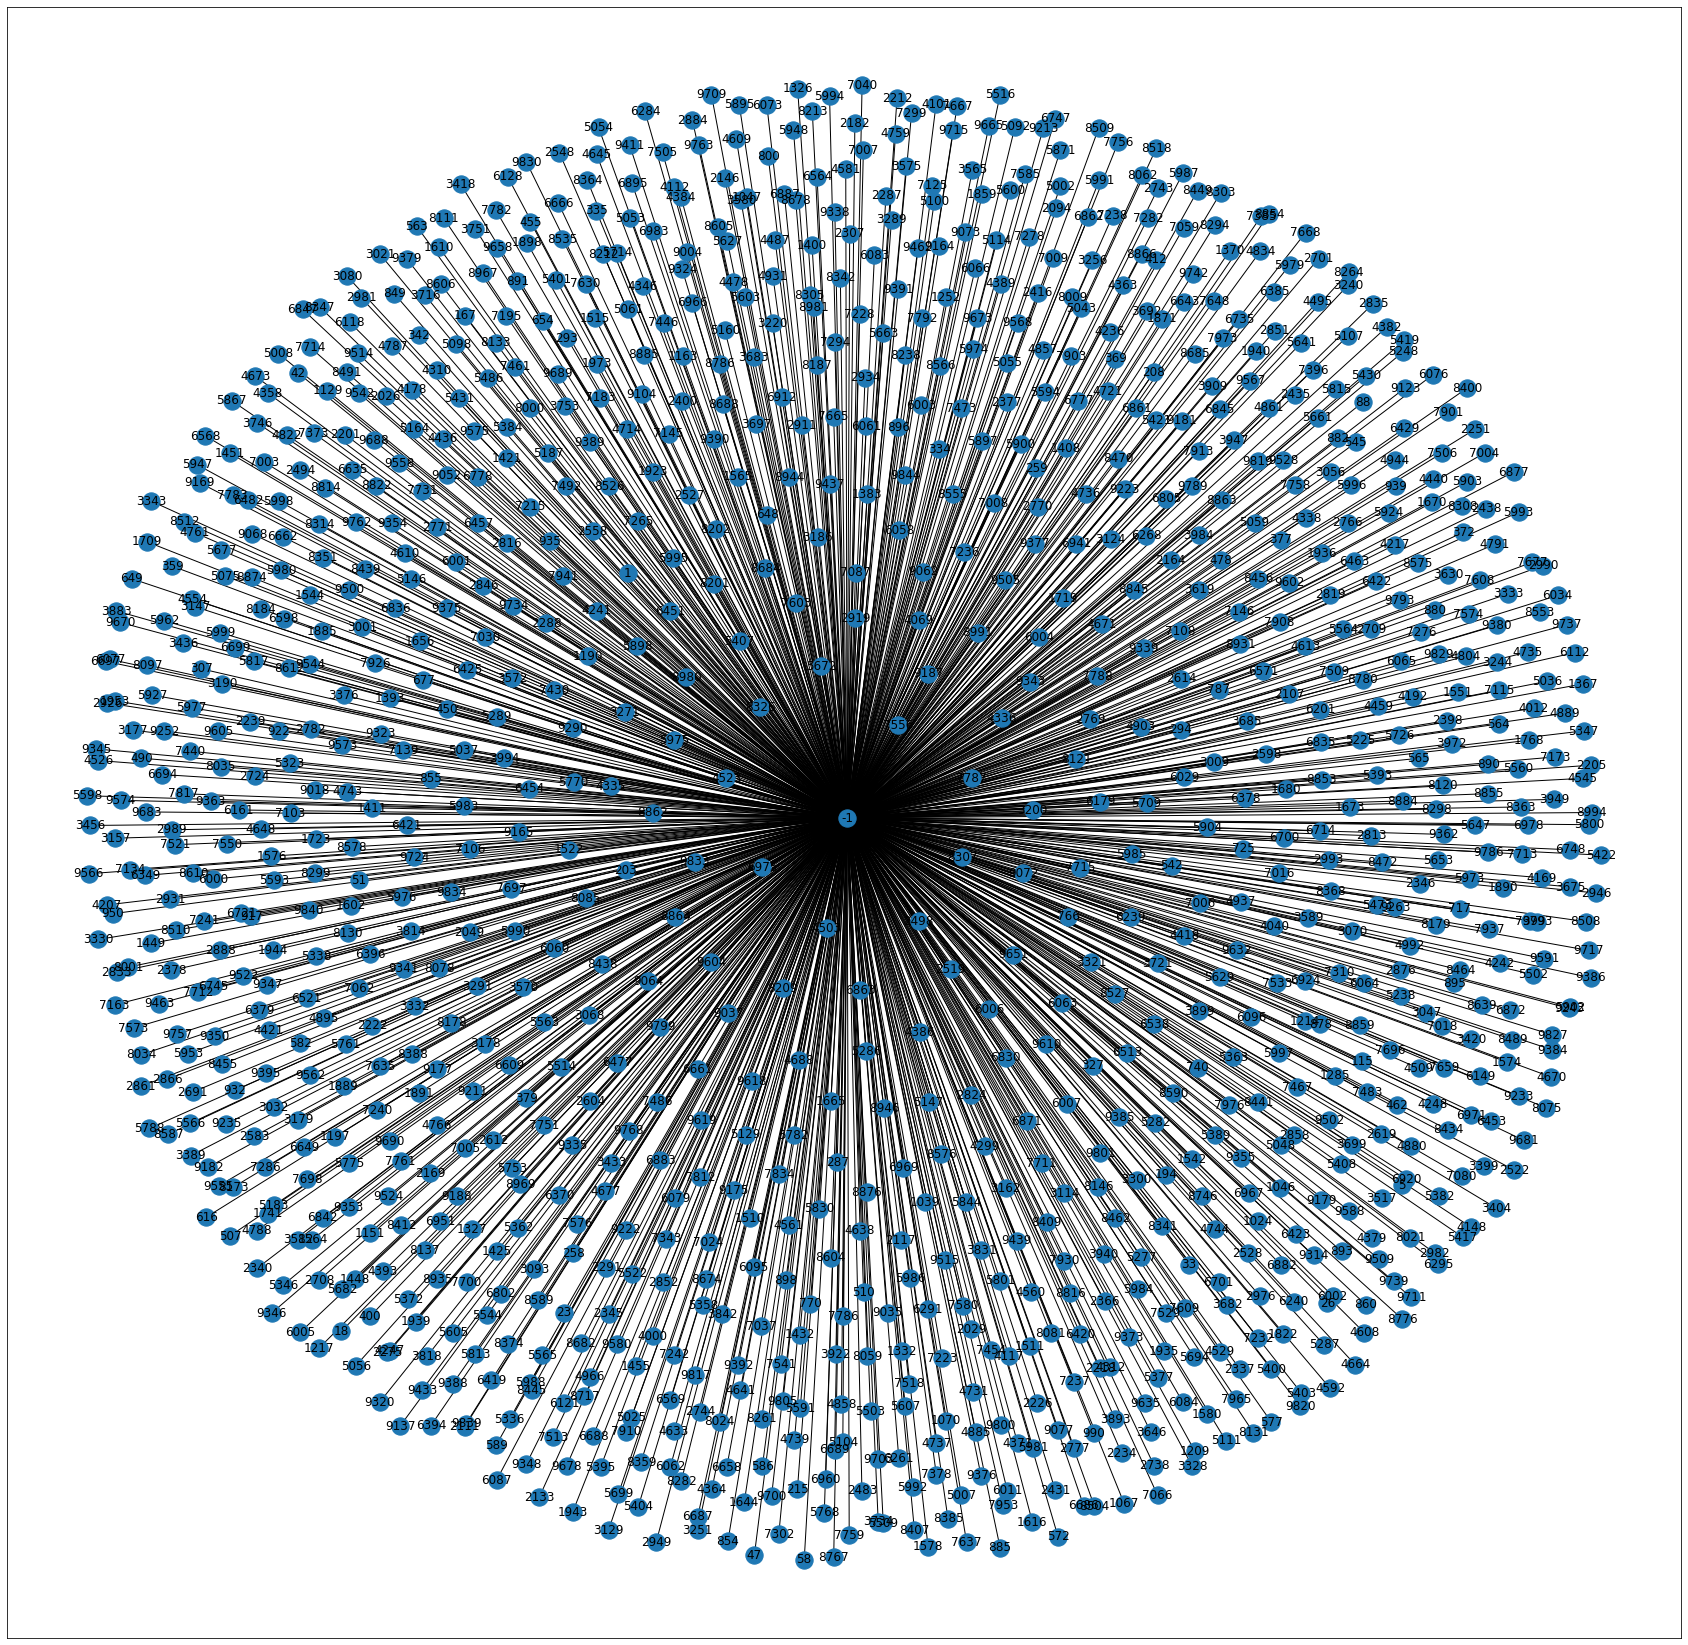

In [17]:
plt.figure(figsize=[30,30])
nx.draw_networkx(positive_graph,pos=nx.spring_layout(positive_graph))

So all the covid+ people have been merged with person -1. We see a centralized network with -1 at the center.

## How far is a covid+ person from you?

### For this we find the distance of person "-1" from any other person. 

Right now our network in unweighted (all the edges in the network have same distance) but the method will be exactly same even if we add weights. In current scenario, weights can be "how much time a p1 spends with p2" or "how close p1 is to p2". All of these can be determined by bluetooth connectivity through app.

The Coronavirus (or person "-1") is the source and target is some other person. Here for example we take person 4504, 2280, 2042 as target people. These are randomly choosen.

In [18]:
for path in nx.all_shortest_paths(full_network,source = -1,target=4504):
    print(path)

[-1, 4446, 335, 7162, 4504]
[-1, 1929, 854, 4505, 4504]


We see covid+ people are 3 hops away from person 4504. Person 4504 is connected to person 7162 who is connected to 335 who is connected to 4446. 4446 is covid positive as we see it is connected to person -1. We also see there are 2 possible paths with same length through which coronavirus can reach person 4504

In [17]:
for path in nx.all_shortest_paths(full_network,source = -1,target=2280):
    print(path)

[-1, 4098, 4148, 1278, 2303, 2280]
[-1, 2271, 3630, 2296, 2273, 2280]
[-1, 552, 6429, 2296, 2273, 2280]
[-1, 5688, 2029, 2283, 2273, 2280]
[-1, 2271, 3630, 2296, 2276, 2280]
[-1, 552, 6429, 2296, 2276, 2280]


Person 2280 is 4 hops away and there are 6 possible paths.

In [26]:
for path in nx.all_shortest_paths(full_network,source = -1,target=2042):
    print(path)

[-1, 6858, 6863, 2042]


This person (person 2042) is in danger. He should avoid meeting person 6863 as 6863 has directly came in contact with 6858 who is corona+.

# Use in Aarogya Setu app
#### This type of graph can be easily made using the data from Aarogya setu app. This technique of finding "hops" or number of perople between covid+ person and the user of app can be useful. 

The user can view his distance (if not complete chain due to privacy issues) from Covid+ person. In case the covid+ person is just 2-3 hops away, it can also help to inform him to avoid certain people to further reduce the risk. 

We can do a lot more with this technique by adding other things like whether a person has already recovered and is immune, weights to the edges etc. We can also warn users to avoid some shops or supermarkets. By making app mandatory for shops/supermarkets we can also mark them safe/unsafe

#### There are many ways to handle even large networks. Networkx itself is capable of handling very large networks. Furthermore through gps data, we can divide the network in small networks city wise or area wise. 